In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [3]:
defaultc = sb.color_palette()[0]

In [4]:
newo = pokemon['generation_id'].value_counts().index

In [5]:
base_color2= sb.color_palette()[1]

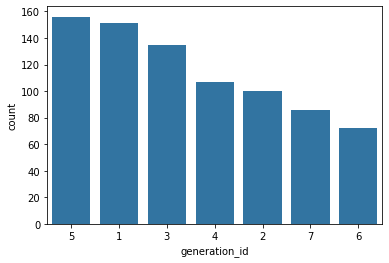

In [6]:
sb.countplot(data = pokemon, x = 'generation_id', color = defaultc, order = newo);



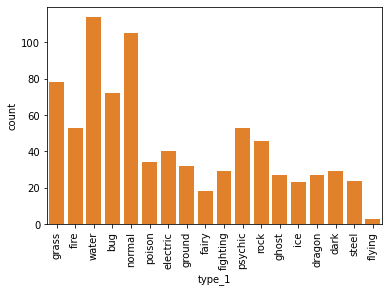

In [7]:
sb.countplot(data = pokemon, x ='type_1', color = base_color2);
plt.xticks(rotation = 90);

In [10]:
sorted = pokemon.type_1.value_counts().index

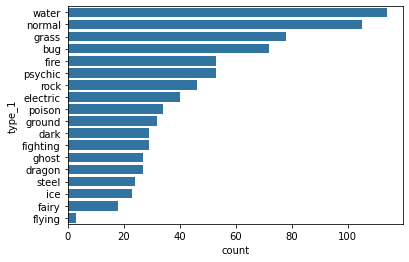

In [11]:
sb.countplot(data = pokemon, y ='type_1', color = defaultc, order =sorted);


frame : DataFrame

id_vars - It is a tuple representing the column(s) to use as identifier variables.

value_vars - It is tuple representing the column(s) to unpivot (remove, out of place).

var_name - It is a name of the new column.

value_name - It is a name to use for the ‘value’ of the columns that are unpivoted.

In [12]:
#
new_types=pokemon.melt(id_vars=['id','species'], 
            value_vars=['type_1','type_2'],
            var_name='types_level', value_name='types')

In [13]:
new_types.dropna()

,id,species,types_level,types
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
...,...,...,...,...
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel


In [38]:
types_order= new_types.types.value_counts().index
types_count = new_types.types.value_counts()

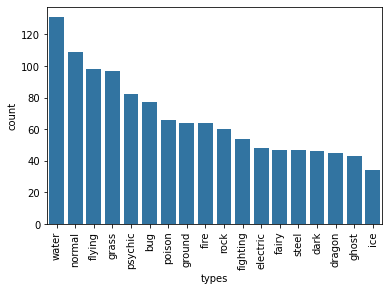

In [39]:
sb.countplot(data =new_types, x='types', color=defaultc,order =types_order);
plt.xticks(rotation=90);

#### Creating a relative frequency bar chart using the propositions

In [17]:
total_counts = new_types.types.value_counts().sum()

In [18]:
total_counts 

1212

In [19]:
max_count = new_types.types.value_counts()[0]

In [20]:
max_count

131

In [21]:
max_propo = max_count / total_counts 

In [22]:
max_propo

0.10808580858085809

Create an array of evenly spaced proportioned values

In [23]:
## Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
ticks= np.arange(0,max_propo, 0.02)
ticks

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

Create a list of String values that can be used as tick labels.


In [24]:
# we need to convert the above array values into strings so that they can be used as tick labels
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in ticks]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

In [25]:
tick2 = []
for i in ticks:
    i = '{:0.2f}'.format(i)
    tick2.append(i)

In [26]:
tick2

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

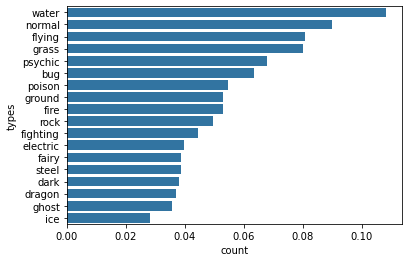

In [40]:
sb.countplot(data =new_types, y='types', color=defaultc,order =types_order);
plt.xticks(ticks * total_counts, tick_names);

#### Printing the text (proportion) on the bars of a horizontal plot.

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

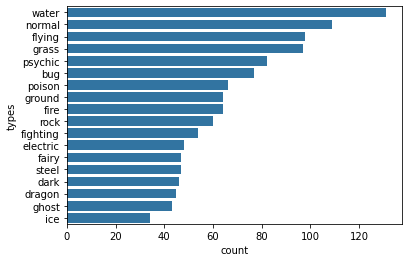

In [43]:
#Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=new_types, y='types', color=base_color, order=types_order);

# Logic to print the proportion text on the bars
for i in range (types_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = types_counts[i]
    # Convert count into a percentage, and then into string
    
    pct_string = '{:0.1f}'.format(100*(count / total_counts))
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')